In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv('data/housing.csv')

In [67]:
#check the missing values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [69]:
#fill missing valus 
df = df.fillna(df.mean())

In [70]:
#check the missing values
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [71]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [72]:
#Create a dataframe that has the dummy variables for ocean_proximity
df = pd.get_dummies(df, ['ocean_proximity'], drop_first=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,0,0,0


In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [74]:
#correlation studys
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,-0.006433,-0.004361,-0.019785,0.000676
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,-0.484859,0.023416,0.160284,0.141862
ocean_proximity_INLAND,-0.055575,0.351166,-0.236645,0.025624,-0.006433,-0.020732,-0.039402,-0.237496,-0.484859,1.000000,-0.010614,-0.240887,-0.262163


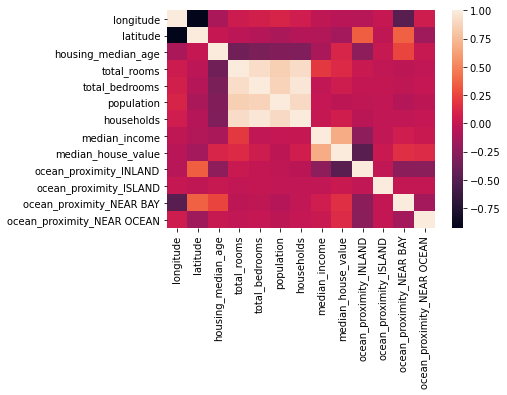

In [75]:
import seaborn as sns
ht = sns.heatmap(df.corr())

In [76]:
#extract dependent and independent variables
X = df.drop('median_house_value',axis=1)
y = df['median_house_value']

In [77]:
#importing OLS statsmodel to check the p-values of the X variable
import statsmodels.api as sm
X2 = sm.add_constant(X) 
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     3130.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:15:08   Log-Likelihood:            -2.5917e+05
No. Observations:               20640   AIC:                         5.184e+05
Df Residuals:                   20627   BIC:                         5.185e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [78]:
#Let's use sklearn to do Linear Regression

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [79]:
#check R^2 value
R2=model.score(X,y)
R2

0.6454747751244775

In [80]:
n = X.shape[0]
k = X.shape[1]
#Calculate Adj R^2 value
def adjR2(n,k,R2):
    return 1 - ((n-1)/(n-k-1))*(1-R2)

In [81]:
adjR2(n,k,R2)

0.6452685259026563

In [82]:
#split the data in training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=89,test_size=0.25)

In [83]:
#k-fold cross validation using linear regression model
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X,y,cv=4).mean()

0.5552996509977777

In [84]:
#predict y values
y_pred = model.predict(X_test)
y_pred

array([ 82014.61206368,  97980.05198844, 134666.32037225, ...,
       208401.2849654 , 253063.58076015, 238400.04921021])

In [85]:
#check the mean squared error between the predicted and true values on the test set
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test,y_pred)) # mae = mean(|y_pred - y_test|)
print(mean_squared_error(y_test,y_pred)) # mse = mean[(y_pred - y_test)^2]

49251.15035046032
4716303942.0797205


In [86]:
# Implement KNN
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor

In [88]:
wcss = []

for i in range(1,11,1):
    knn =KNeighborsRegressor(n_neighbors=i,weights='uniform')
    val=cross_val_score(knn,X,y,cv=4).mean()
    wcss.append(val)
    print('k-fold',i,'is',val)
    
wcss    

k-fold 1 is -0.38854997984694867
k-fold 2 is -0.06292802598715744
k-fold 3 is 0.03668118287059169
k-fold 4 is 0.08179084182714147
k-fold 5 is 0.11056648523129864
k-fold 6 is 0.13097397389174845
k-fold 7 is 0.14334146137361095
k-fold 8 is 0.15342621195017478
k-fold 9 is 0.16152364751509118
k-fold 10 is 0.1674322032008148


[-0.38854997984694867,
 -0.06292802598715744,
 0.03668118287059169,
 0.08179084182714147,
 0.11056648523129864,
 0.13097397389174845,
 0.14334146137361095,
 0.15342621195017478,
 0.16152364751509118,
 0.1674322032008148]

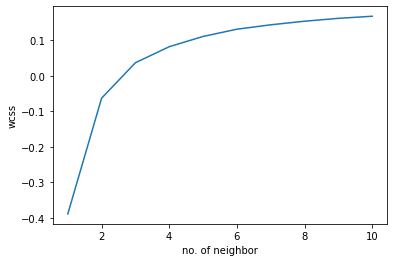

In [89]:

     
import matplotlib.pyplot as plt
plt.plot(range(1,11,1),wcss)
plt.xlabel('no. of neighbor')
plt.ylabel('wcss')
plt.show()

In [96]:
knn =KNeighborsRegressor(n_neighbors=6,weights='uniform')
print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.270514


In [24]:
# Implement adaboost using sklearn
from sklearn.ensemble import AdaBoostClassifier

In [25]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [26]:
clf.score(X_test, y_test)

0.04437984496124031

In [27]:
# Implement random forest using sklearn
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=0)

In [28]:
regr.score(X_test, y_test)

0.5804592422628556

In [33]:
# Implement SVR using sklearn
from sklearn import svm
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
regSVR = make_pipeline(StandardScaler(), SVR(C=300, epsilon=0.2))
regSVR.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=300, epsilon=0.2))])

In [34]:
regSVR.score(X_test, y_test)

0.4919321460315482

In [31]:
model.intercept_

-2235716.962486333

In [45]:
model.coef_

array([-2.64582900e+04, -2.51971995e+04,  1.05786379e+03, -4.77253023e+00,
        7.22895875e+01, -3.92618423e+01,  7.69408613e+01,  3.87749138e+04,
       -3.97196762e+04,  1.56041971e+05, -3.68975069e+03,  4.74740208e+03])

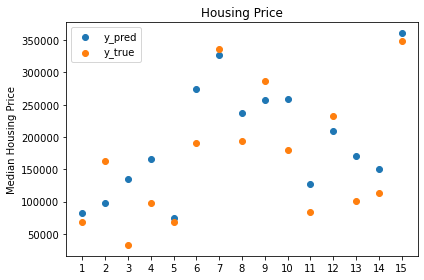

In [35]:
n = 15
x = np.arange(1, n+1)
y_true = y_test[: n]
y_pred = y_pred[: n]
plt.scatter(x, y_pred)
plt.scatter(x, y_true)
plt.legend(['y_pred', 'y_true'])
plt.title('Housing Price')
plt.ylabel('Median Housing Price')
plt.xticks(np.arange(1, n+1))
plt.tight_layout()